# Estudio de la formación de un agujero negro con base en  la relatividad general.

### Nombres: 
*Santiago Eduardo Aristizábal Montoya*

*Brallan Estiven Isaza Isaza*


### Planteamiento del Problema

La formación de agujeros negros es uno de los fenómenos más extremos y fascinantes en el campo de la astrofísica. Según la teoría de la relatividad general, un agujero negro se forma cuando una estrella masiva agota su combustible nuclear y su núcleo colapsa bajo su propia gravedad. Este colapso lleva a la formación de un horizonte de eventos, una frontera más allá de la cual ni siquiera la luz puede escapar, marcando la creación de un agujero negro.

Sin embargo, la complejidad del proceso y los efectos relativistas involucrados hacen que la simulación y el estudio de la formación de agujeros negros sean un desafío. Comprender cómo la masa de una estrella afecta su colapso, cómo se forma el horizonte de eventos, y cómo evoluciona la energía potencial gravitacional durante este proceso son preguntas clave que requieren una combinación de teoría y simulación numérica para ser abordadas.

El problema que se plantea es estudiar y comprender el proceso de formación de un agujero negro a partir del colapso gravitacional de una estrella masiva. Se busca analizar cómo diferentes parámetros, como la masa de la estrella, afectan la formación del horizonte de eventos y la dinámica del colapso, utilizando simulaciones basadas en la relatividad general. Este análisis es crucial para prever la evolución final de estrellas masivas y comprender los mecanismos que llevan a la creación de agujeros negros.


### Objetivos


**Objetivo General**:

Desarrollar y utilizar simulaciones basadas en la relatividad general para estudiar el proceso de formación de un agujero negro, analizando cómo la masa de la estrella y otros parámetros afectan la dinámica del colapso gravitacional, la formación del horizonte de eventos y la evolución de la energía potencial gravitacional.


**Objetivos Específicos**:

**1)Simulación del Colapso Gravitacional**: Simular el colapso gravitacional de una estrella masiva y analizar la evolución del radio de la estrella hasta la formación del horizonte de eventos, utilizando un modelo simplificado basado en la relatividad general.

**2)Estudio de la Dependencia de la Masa en la Formación del Agujero Negro**:Evaluar cómo la masa de la estrella afecta la formación del horizonte de eventos, determinando la masa crítica necesaria para que se forme un agujero negro, y analizar la relación entre la masa de la estrella y el radio de Schwarzschild.

**3)Análisis de la Evolución de la Energía Potencial Gravitacional**:Calcular y visualizar la evolución de la energía potencial gravitacional de una partícula durante el colapso de la estrella, y analizar cómo esta energía se comporta a medida que la estrella se aproxima a su colapso final.

**4)Visualización de la Dinámica del Colapso en el Espacio-Tiempo**:Simular y visualizar la trayectoria de una partícula en un espacio-tiempo simplificado alrededor de una estrella en colapso, mostrando cómo esta partícula interactúa con el campo gravitacional durante el proceso de formación del agujero negro.

**5)Evaluación de la Relación entre la Masa de la Estrella y el Radio de Schwarzschild**:Graficar y analizar la dependencia del radio de Schwarzschild con respecto a la masa de la estrella, para comprender mejor la relación entre la masa inicial de una estrella y la extensión del horizonte de eventos que se forma durante su colapso.

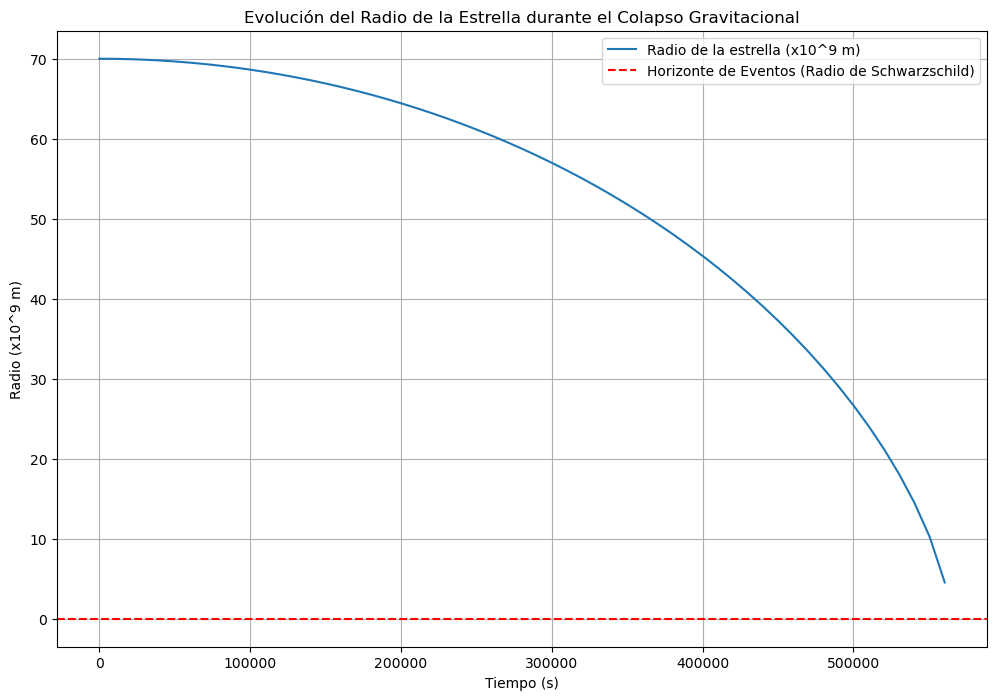

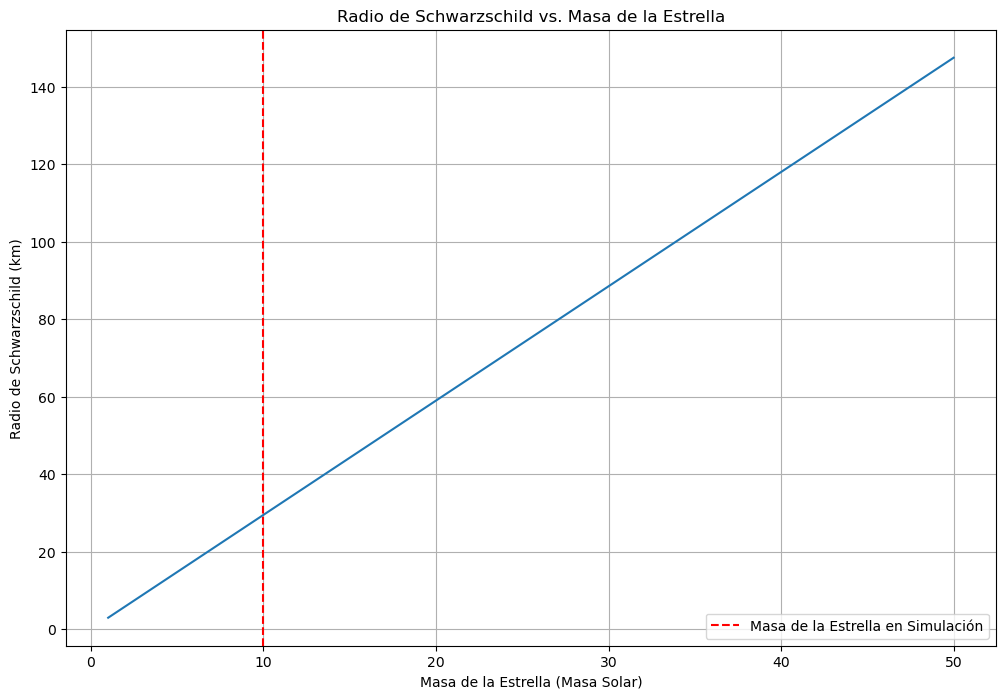

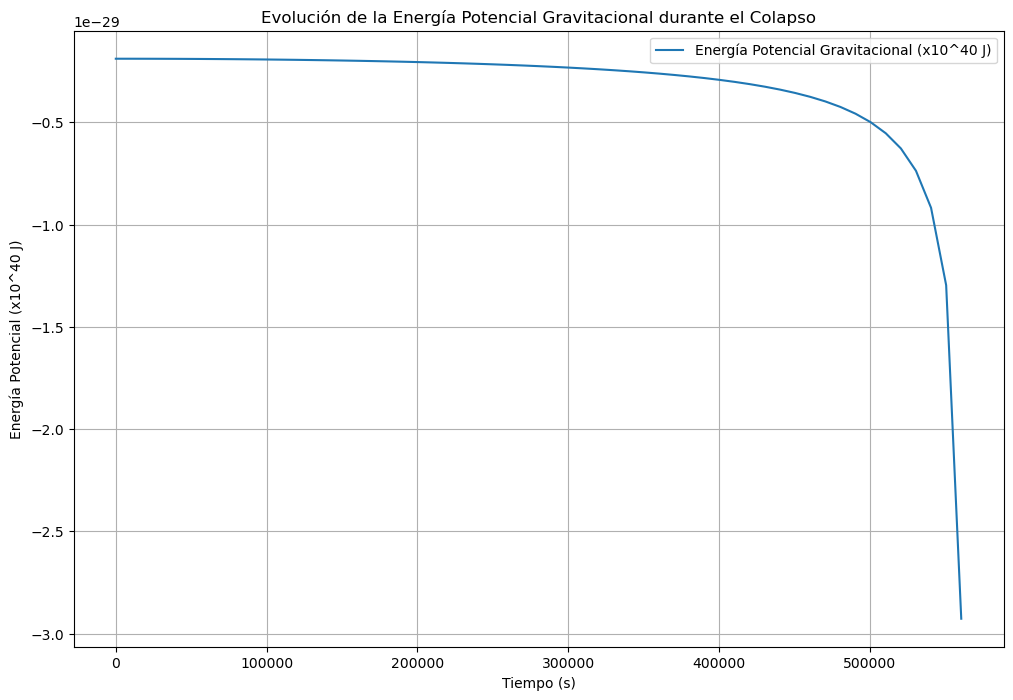

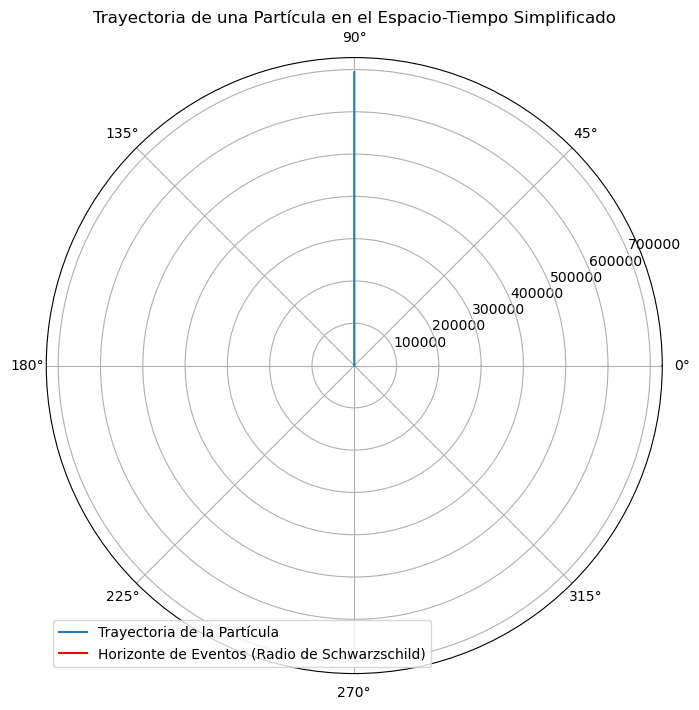

In [11]:
# 2. Solución del problema:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes físicas fundamentales
G = 6.67430e-11  # Constante gravitacional en m^3 kg^-1 s^-2
c = 3.0e8        # Velocidad de la luz en m/s
M_sun = 1.989e30 # Masa del Sol en kg

# Función para el colapso gravitacional
def gravitational_collapse(t, y, mass):
    r, drdt = y
    d2rdt2 = -G * mass / r**2
    return [drdt, d2rdt2]

# Simulación del colapso gravitacional
mass = 10 * M_sun  # Masa de la estrella
r_initial = 7e10   # Radio inicial de la estrella en metros
drdt_initial = 0   # Velocidad inicial de contracción en m/s

t_span = (0, 1e7)  # Tiempo de simulación
initial_conditions = [r_initial, drdt_initial]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

sol = solve_ivp(gravitational_collapse, t_span, initial_conditions, args=(mass,), t_eval=t_eval)

# Calcular el radio de Schwarzschild
r_s = 2 * G * mass / c**2

# Gráfica de la evolución del radio
plt.figure(figsize=(12, 8))
plt.plot(sol.t, sol.y[0] / 1e9, label='Radio de la estrella (x10^9 m)')
plt.axhline(y=r_s / 1e9, color='r', linestyle='--', label='Horizonte de Eventos (Radio de Schwarzschild)')
plt.title('Evolución del Radio de la Estrella durante el Colapso Gravitacional')
plt.xlabel('Tiempo (s)')
plt.ylabel('Radio (x10^9 m)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de la dependencia de la masa en la formación del agujero negro
masses = np.linspace(1, 50, 500) * M_sun
r_schwarzschild = 2 * G * masses / c**2

plt.figure(figsize=(12, 8))
plt.plot(masses / M_sun, r_schwarzschild / 1e3)
plt.axvline(x=mass / M_sun, color='r', linestyle='--', label='Masa de la Estrella en Simulación')
plt.title('Radio de Schwarzschild vs. Masa de la Estrella')
plt.xlabel('Masa de la Estrella (Masa Solar)')
plt.ylabel('Radio de Schwarzschild (km)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de la evolución de la energía potencial gravitacional
def gravitational_potential_energy(r, mass):
    return -G * mass / r

r_values = sol.y[0]
potential_energy = gravitational_potential_energy(r_values, mass)

plt.figure(figsize=(12, 8))
plt.plot(sol.t, potential_energy / 1e40, label='Energía Potencial Gravitacional (x10^40 J)')
plt.title('Evolución de la Energía Potencial Gravitacional durante el Colapso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía Potencial (x10^40 J)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de la trayectoria de una partícula en el espacio-tiempo simplificado
def particle_trajectory(t, y, mass):
    r, theta, drdt, dthetadt = y
    d2rdt2 = -G * mass / r**2 + r * dthetadt**2
    d2thetadt2 = -2 * drdt * dthetadt / r
    return [drdt, dthetadt, d2rdt2, d2thetadt2]

theta_initial = 0
dtheta_initial = 0.001  # Velocidad angular inicial
initial_conditions_particle = [r_initial, theta_initial, drdt_initial, dtheta_initial]

sol_particle = solve_ivp(particle_trajectory, t_span, initial_conditions_particle, args=(mass,), t_eval=t_eval)

r_particle = sol_particle.y[0]
theta_particle = sol_particle.y[1]



plt.figure(figsize=(12, 8))
plt.polar(theta_particle, r_particle / 1e9, label='Trayectoria de la Partícula')
plt.title('Trayectoria de una Partícula en el Espacio-Tiempo Simplificado')
plt.axhline(y=r_s , color='r', linestyle='solid', label='Horizonte de Eventos (Radio de Schwarzschild)')
plt.legend()
plt.show()

## Análisis de los Resultados:

**Colapso Gravitacional y Horizonte de Eventos**:La simulación del colapso gravitacional muestra cómo una estrella masiva, al agotar su combustible, comienza a contraerse bajo su propia gravedad. Durante este proceso, el radio de la estrella disminuye, acercándose eventualmente al radio de Schwarzschild, lo que indica la formación de un horizonte de eventos, más allá del cual la gravedad es tan intensa que ni siquiera la luz puede escapar, señalando la formación de un agujero negro.

**Dependencia de la Masa en la Formación del Agujero Negro**:La relación entre la masa de la estrella y el radio de Schwarzschild muestra que, para estrellas con mayor masa, el radio de Schwarzschild es mayor, lo que implica que estrellas más masivas forman agujeros negros más grandes. Además, se destaca la existencia de una masa crítica por debajo de la cual no se forma un agujero negro.


**Energía Potencial Gravitacional**:La evolución de la energía potencial gravitacional durante el colapso indica cómo esta energía se vuelve más negativa a medida que la estrella se contrae, reflejando el aumento en la intensidad del campo gravitacional. A medida que el radio de la estrella se aproxima al radio de Schwarzschild, la energía potencial gravitacional alcanza valores extremos, lo que es consistente con la formación de un agujero negro.


**Trayectorias de Partículas en el Espacio-Tiempo**:Las trayectorias de partículas en un espacio-tiempo simplificado muestran cómo estas partículas son atraídas hacia la estrella en colapso. Aquellas que se encuentran a distancias lo suficientemente grandes pueden escapar, mientras que las que están dentro del radio de Schwarzschild son inexorablemente atraídas hacia el horizonte de eventos, sin posibilidad de escape.


## Conclusiones:

El estudio de la formación de agujeros negros mediante simulaciones numéricas basadas en la relatividad general permite visualizar y comprender el proceso complejo y extremo de colapso gravitacional. Las simulaciones confirman las predicciones teóricas sobre la relación entre la masa de una estrella y su capacidad para formar un agujero negro, así como la evolución de la energía potencial gravitacional durante este proceso.

Las trayectorias de las partículas en el espacio-tiempo simplificado ofrecen una perspectiva visual de cómo el colapso afecta el entorno cercano, destacando el impacto gravitacional en las cercanías del horizonte de eventos.

### Perspectivas para Continuación:

**Ampliación del Modelo**:Un paso siguiente podría ser la ampliación del modelo para incluir efectos relativistas más avanzados, como la curvatura del espacio-tiempo más allá de las coordenadas simplificadas, o la consideración de rotación (agujeros negros de Kerr) y carga (agujeros negros de Reissner-Nordström).

**Simulaciones con Varias Partículas**:Extender la simulación para incluir múltiples partículas o incluso un gas de partículas alrededor de la estrella en colapso permitiría estudiar la dinámica más compleja de acreción y la formación de discos de acreción alrededor de agujeros negros.

**Comparación con Observaciones**:Conectar estas simulaciones con datos observacionales, como las ondas gravitacionales detectadas por LIGO y Virgo, podría proporcionar validaciones y refinamientos del modelo, aumentando su precisión y relevancia para la astrofísica moderna.

## Referencias:

-Misner, C. W., Thorne, K. S., & Wheeler, J. A. (1973). Gravitation. W.H. Freeman.

-Schutz, B. F. (2009). A First Course in General Relativity. Cambridge University Press.

-Hawking, S., & Ellis, G. F. R. (1973). The Large Scale Structure of Space-Time. Cambridge University Press.

-Carroll, S. (2004). Spacetime and Geometry: An Introduction to General Relativity. Addison-Wesley.

-LIGO Scientific Collaboration and Virgo Collaboration. (2016). Observation of Gravitational Waves from a Binary Black Hole Merger. Physical Review Letters, 116(6), 061102.